In [1]:
from time import time
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from kftneutrinos import py_first_order, py_second_order_kft

In [2]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
fontsize = 11/1.2*4
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

In [5]:
Tnu = 0.0001676375864435959
Gauss_Laguerre = 80
int_free_analytical = 4*np.pi*1.803*Tnu**3

rtols = np.array([1e-7, 1e-5, 1e-5])
atols = np.array([1e-35, 1e-35, 1e-35])

rtols_2 = np.array([1e-6, 1e-5, 1e-5, 1e-5])
atols_2 = np.array([1e-35, 1e-35, 1e-35, 1e-35])

In [6]:
mass = 0.05
r = 8.0
z_ini = 3.0

Mvir_list = 3.02*np.array([1e+10, 1e+11, 1e+12, 1e+13, 1e+14])
first_list = []
second_list = []
for Mvir in Mvir_list:
    tic = perf_counter()
    first_list.append(py_first_order(mass, z_ini, rtols, atols, r, Mvir, Gauss_Laguerre, Tnu))
    second_list.append(py_second_order_kft(mass, z_ini, rtols_2, atols_2, r, Mvir, Gauss_Laguerre, Tnu))
    print(f"Computed {Mvir=} in {perf_counter() - tic:.3} s.")
first = np.array(first_list)/int_free_analytical
second = (np.array(first_list) + np.array(second_list))/int_free_analytical

Computed Mvir=30200000000.0 in 3.8 s.
Computed Mvir=302000000000.0 in 1.43 s.
Computed Mvir=3020000000000.0 in 5.64 s.
Computed Mvir=30200000000000.0 in 6.67 s.
Computed Mvir=302000000000000.0 in 7.35 s.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_91633/2606942678.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2, 1, figsize=[5, 5])


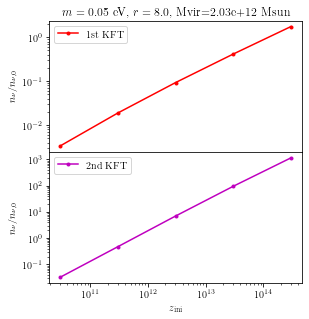

In [7]:
fig, ax = plt.subplots(2, 1, figsize=[5, 5])
ax[0].set_title(f"$m={mass}$ eV, $r={r}$, Mvir=2.03e+12 Msun")
ax[0].plot(Mvir_list, first, 'r.-', label='1st KFT')
ax[1].plot(Mvir_list, second, 'm.-', label='2nd KFT')
ax[0].set(ylabel=r'$n_\nu / n_{\nu,0}$')
ax[1].set(xlabel=r'$z_\mathrm{ini}$', ylabel=r'$n_\nu / n_{\nu,0}$')
for axis in ax:
    axis.set(xscale='log', yscale='log')
ax[0].legend()
ax[1].legend()
fig.subplots_adjust(bottom=0.1505, left=0.195, hspace=0)
fig.savefig('Mvir_profile.pdf')

# Mass profile for different Mvir

In [16]:
masses = np.logspace(-4., -0.4, 5)
Mvir_list = 3.02*np.array([1e+7, 1e+8, 1e+9, 1e+10, 1e+12, 1e+14])

results = {}
for Mvir in Mvir_list:
    first_list = []
    second_list = []
    for mass in masses:
        tic = perf_counter()
        first_list.append(py_first_order(mass, z_ini, rtols, atols, r, Mvir, Gauss_Laguerre, Tnu))
        second_list.append(py_second_order_kft(mass, z_ini, rtols_2, atols_2, r, Mvir, Gauss_Laguerre, Tnu))
        print(f"Computed {Mvir=} in {perf_counter() - tic:.3} s.")
    results[Mvir] = {
        'first': np.array(first_list)/int_free_analytical,
        'second': (np.array(first_list) + np.array(second_list))/int_free_analytical
    }

Computed Mvir=30200000.0 in 0.0628 s.
Computed Mvir=30200000.0 in 0.0428 s.
Computed Mvir=30200000.0 in 0.0736 s.
Computed Mvir=30200000.0 in 0.182 s.
Computed Mvir=30200000.0 in 24.3 s.
Computed Mvir=302000000.0 in 0.0398 s.
Computed Mvir=302000000.0 in 0.0622 s.
Computed Mvir=302000000.0 in 0.0732 s.
Computed Mvir=302000000.0 in 4.55 s.
Computed Mvir=302000000.0 in 17.3 s.
Computed Mvir=3020000000.0 in 0.0404 s.
Computed Mvir=3020000000.0 in 0.0817 s.
Computed Mvir=3020000000.0 in 0.361 s.
Computed Mvir=3020000000.0 in 3.49 s.
Computed Mvir=3020000000.0 in 22.8 s.
Computed Mvir=30200000000.0 in 0.0393 s.
Computed Mvir=30200000000.0 in 0.0802 s.
Computed Mvir=30200000000.0 in 0.446 s.
Computed Mvir=30200000000.0 in 3.79 s.
Computed Mvir=30200000000.0 in 38.4 s.
Computed Mvir=3020000000000.0 in 0.0808 s.
Computed Mvir=3020000000000.0 in 0.69 s.
Computed Mvir=3020000000000.0 in 1.55 s.
Computed Mvir=3020000000000.0 in 5.72 s.
Computed Mvir=3020000000000.0 in 29.3 s.
Computed Mvir=302000

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_91633/3529219094.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[6, 5])


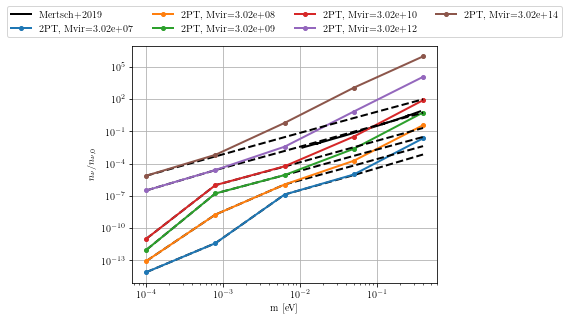

In [17]:
mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

lwidth=2
mss=8
fig, ax = plt.subplots(1, 1, figsize=[6, 5])
ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], 'k-', label=f"Mertsch+2019", lw=lwidth)
for Mvir, result in results.items():
    ax.plot(masses, result['first'], 'k--', markersize=mss, lw=lwidth)
    ax.plot(masses, result['second'], '.-', markersize=mss, label=f'2PT, Mvir={Mvir:.2e}', lw=lwidth)
ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{\nu,0}$', xscale='log', yscale='log')
#ax.set(xlim=[min(masses)*45, max(masses)])
ax.legend(frameon=True, bbox_to_anchor=(0.5, 1.1), ncol=4, loc='center')
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('Mvir_masses.pdf')